## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../satori')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions

exp_name = '../results/arabidopsis/complex/E1/'
satori_path = 'Interactions_SATORI/interactions_summary_attnLimit-0.1416546424431244.txt'
df = pd.read_csv(exp_name + satori_path, sep='\t')
##df = pd.read_csv('../../Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results_v9_run2_5000/interactions_summary_attnLimit-0.12.txt', sep='\t')

# For FIS based interactions
#df = pd.read_csv('../results/Arabidopsis_GenomeWide_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-10.0.txt', sep='\t')
##df = pd.read_csv('../../DFIM_Arabidopsis_experiment_v10/Interactions/interactions_summary_attnLimit-0.txt', sep='\t')

In [3]:
output = exp_name + 'Interactions_SATORI/'

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [4]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [5]:
df.shape

(253, 12)

In [6]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
2,filter18<-->filter22,4440,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000055,212.0,36.0,1554.0,1225.0,4.188078e-25,4.746489e-23
4,filter18<-->filter37,4455,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000088,44.0,248.0,1381.0,1522.0,1.551824e-05,2.122865e-04
5,filter18<-->filter48,4466,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.At3g45610_colamp_a_m1,0.024644,356.0,144.0,1086.0,1129.0,9.031173e-03,4.542026e-02
6,filter18<-->filter53,4471,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.OBP3_col_a_m1,0.000963,100.0,4.0,1028.0,1051.0,1.380371e-08,3.572983e-07
8,filter18<-->filter75,4493,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_col_a_m1,0.006082,276.0,264.0,1377.0,1623.0,6.294189e-08,1.443727e-06


### Annotate the interacting motifs

In [7]:
df['TF1'] = df['motif1'].apply(lambda x: x.split('_')[1].strip('.tnt'))
df['TF2'] = df['motif2'].apply(lambda x: x.split('_')[1].strip('.tnt'))

In [8]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
2,filter18<-->filter22,4440,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000055,212.0,36.0,1554.0,1225.0,4.188078e-25,4.746489e-23,RAP211,REM19
4,filter18<-->filter37,4455,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000088,44.0,248.0,1381.0,1522.0,1.551824e-05,2.122865e-04,RAP211,REM19
5,filter18<-->filter48,4466,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.At3g45610_colamp_a_m1,0.024644,356.0,144.0,1086.0,1129.0,9.031173e-03,4.542026e-02,RAP211,At3g45610
6,filter18<-->filter53,4471,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.OBP3_col_a_m1,0.000963,100.0,4.0,1028.0,1051.0,1.380371e-08,3.572983e-07,RAP211,OBP3
8,filter18<-->filter75,4493,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_col_a_m1,0.006082,276.0,264.0,1377.0,1623.0,6.294189e-08,1.443727e-06,RAP211,REM19


In [9]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [10]:
df = df[df['TF1']!=df['TF2']]

In [11]:
df.shape

(239, 15)

In [12]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [13]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [14]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter18<-->filter22,4440,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000055,212.0,36.0,1554.0,1225.0,4.188078e-25,4.746489e-23,RAP211,REM19,RAP211$\longleftrightarrow$REM19
1,filter18<-->filter37,4455,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000088,44.0,248.0,1381.0,1522.0,1.551824e-05,2.122865e-04,RAP211,REM19,RAP211$\longleftrightarrow$REM19
2,filter18<-->filter48,4466,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.At3g45610_colamp_a_m1,0.024644,356.0,144.0,1086.0,1129.0,9.031173e-03,4.542026e-02,RAP211,At3g45610,RAP211$\longleftrightarrow$At3g45610
3,filter18<-->filter53,4471,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.OBP3_col_a_m1,0.000963,100.0,4.0,1028.0,1051.0,1.380371e-08,3.572983e-07,RAP211,OBP3,RAP211$\longleftrightarrow$OBP3
4,filter18<-->filter75,4493,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_col_a_m1,0.006082,276.0,264.0,1377.0,1623.0,6.294189e-08,1.443727e-06,RAP211,REM19,RAP211$\longleftrightarrow$REM19


In [15]:
df.shape

(239, 15)

## Most Frequent TF Family Interactions

In [16]:
df['TF1_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF2_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [17]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [18]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [19]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter18<-->filter22,4440,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000055,212.0,36.0,1554.0,1225.0,4.188078e-25,4.746489e-23,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
1,filter18<-->filter37,4455,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000088,44.0,248.0,1381.0,1522.0,1.551824e-05,2.122865e-04,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
2,filter18<-->filter48,4466,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.At3g45610_colamp_a_m1,0.024644,356.0,144.0,1086.0,1129.0,9.031173e-03,4.542026e-02,RAP211,At3g45610,RAP211$\longleftrightarrow$At3g45610,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
3,filter18<-->filter53,4471,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.OBP3_col_a_m1,0.000963,100.0,4.0,1028.0,1051.0,1.380371e-08,3.572983e-07,RAP211,OBP3,RAP211$\longleftrightarrow$OBP3,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
4,filter18<-->filter75,4493,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_col_a_m1,0.006082,276.0,264.0,1377.0,1623.0,6.294189e-08,1.443727e-06,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM


In [20]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [21]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter18$\longleftrightarrow$filter22,4440,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000055,212.0,36.0,1554.0,1225.0,4.188078e-25,4.746489e-23,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
1,filter18$\longleftrightarrow$filter37,4455,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000088,44.0,248.0,1381.0,1522.0,1.551824e-05,2.122865e-04,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
2,filter18$\longleftrightarrow$filter48,4466,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.At3g45610_colamp_a_m1,0.024644,356.0,144.0,1086.0,1129.0,9.031173e-03,4.542026e-02,RAP211,At3g45610,RAP211$\longleftrightarrow$At3g45610,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
3,filter18$\longleftrightarrow$filter53,4471,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.OBP3_col_a_m1,0.000963,100.0,4.0,1028.0,1051.0,1.380371e-08,3.572983e-07,RAP211,OBP3,RAP211$\longleftrightarrow$OBP3,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
4,filter18$\longleftrightarrow$filter75,4493,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_col_a_m1,0.006082,276.0,264.0,1377.0,1623.0,6.294189e-08,1.443727e-06,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM


In [22]:
df

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter18$\longleftrightarrow$filter22,4440,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000055,212.0,36.0,1554.0,1225.0,4.188078e-25,4.746489e-23,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
1,filter18$\longleftrightarrow$filter37,4455,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_colamp_a_m1,0.000088,44.0,248.0,1381.0,1522.0,1.551824e-05,2.122865e-04,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
2,filter18$\longleftrightarrow$filter48,4466,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.At3g45610_colamp_a_m1,0.024644,356.0,144.0,1086.0,1129.0,9.031173e-03,4.542026e-02,RAP211,At3g45610,RAP211$\longleftrightarrow$At3g45610,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
3,filter18$\longleftrightarrow$filter53,4471,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,C2C2dof_tnt.OBP3_col_a_m1,0.000963,100.0,4.0,1028.0,1051.0,1.380371e-08,3.572983e-07,RAP211,OBP3,RAP211$\longleftrightarrow$OBP3,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
4,filter18$\longleftrightarrow$filter75,4493,AP2EREBP_tnt.RAP211_colamp_a_m1,0.001707,REM_tnt.REM19_col_a_m1,0.006082,276.0,264.0,1377.0,1623.0,6.294189e-08,1.443727e-06,RAP211,REM19,RAP211$\longleftrightarrow$REM19,AP2EREBP,REM,AP2EREBP$\longleftrightarrow$REM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,filter216$\longleftrightarrow$filter221,31864,AP2EREBP_tnt.At4g31060_col_a_m1,0.004355,Trihelix_tnt.GT2_col_a_m1,0.002801,184.0,120.0,1984.0,1083.0,3.635241e-03,2.181545e-02,At4g31060,GT2,At4g31060$\longleftrightarrow$GT2,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix
235,filter216$\longleftrightarrow$filter249,31892,AP2EREBP_tnt.At4g31060_col_a_m1,0.004355,C2C2dof_tnt.AT1G69570_col_a_m1,0.016271,504.0,272.0,1548.0,925.0,3.023005e-03,1.872668e-02,At4g31060,AT1G69570,At4g31060$\longleftrightarrow$AT1G69570,AP2EREBP,C2C2dof,AP2EREBP$\longleftrightarrow$C2C2dof
236,filter221$\longleftrightarrow$filter248,32071,Trihelix_tnt.GT2_col_a_m1,0.002801,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.004317,172.0,140.0,2762.0,2198.0,2.354823e-09,6.918220e-08,GT2,AT1G69570,AT1G69570$\longleftrightarrow$GT2,Trihelix,C2C2dof,C2C2dof$\longleftrightarrow$Trihelix
237,filter221$\longleftrightarrow$filter249,32072,Trihelix_tnt.GT2_col_a_m1,0.002801,C2C2dof_tnt.AT1G69570_col_a_m1,0.016271,304.0,188.0,2650.0,2287.0,2.337124e-10,7.888699e-09,GT2,AT1G69570,AT1G69570$\longleftrightarrow$GT2,Trihelix,C2C2dof,C2C2dof$\longleftrightarrow$Trihelix


In [23]:
df.to_csv(f'{output}/Arabidopsis_interactions.csv')

In [24]:
most_freq = df['TF_Interaction'].value_counts()[:10]

In [25]:
most_freq

MYB51$\longleftrightarrow$AT1G69570        47
AT1G69570$\longleftrightarrow$AT2G20400    39
AT1G69570$\longleftrightarrow$AT2G40260    38
MYB51$\longleftrightarrow$AT2G40260        34
WRKY31$\longleftrightarrow$AT1G69570       32
WRKY31$\longleftrightarrow$AT2G40260       24
MYB67$\longleftrightarrow$AT1G69570        24
WRKY31$\longleftrightarrow$MYB51           23
AT2G33550$\longleftrightarrow$AT1G69570    23
AT1G12630$\longleftrightarrow$MYB51        21
Name: TF_Interaction, dtype: int64

### Distribution of individual TF or TF family interactions

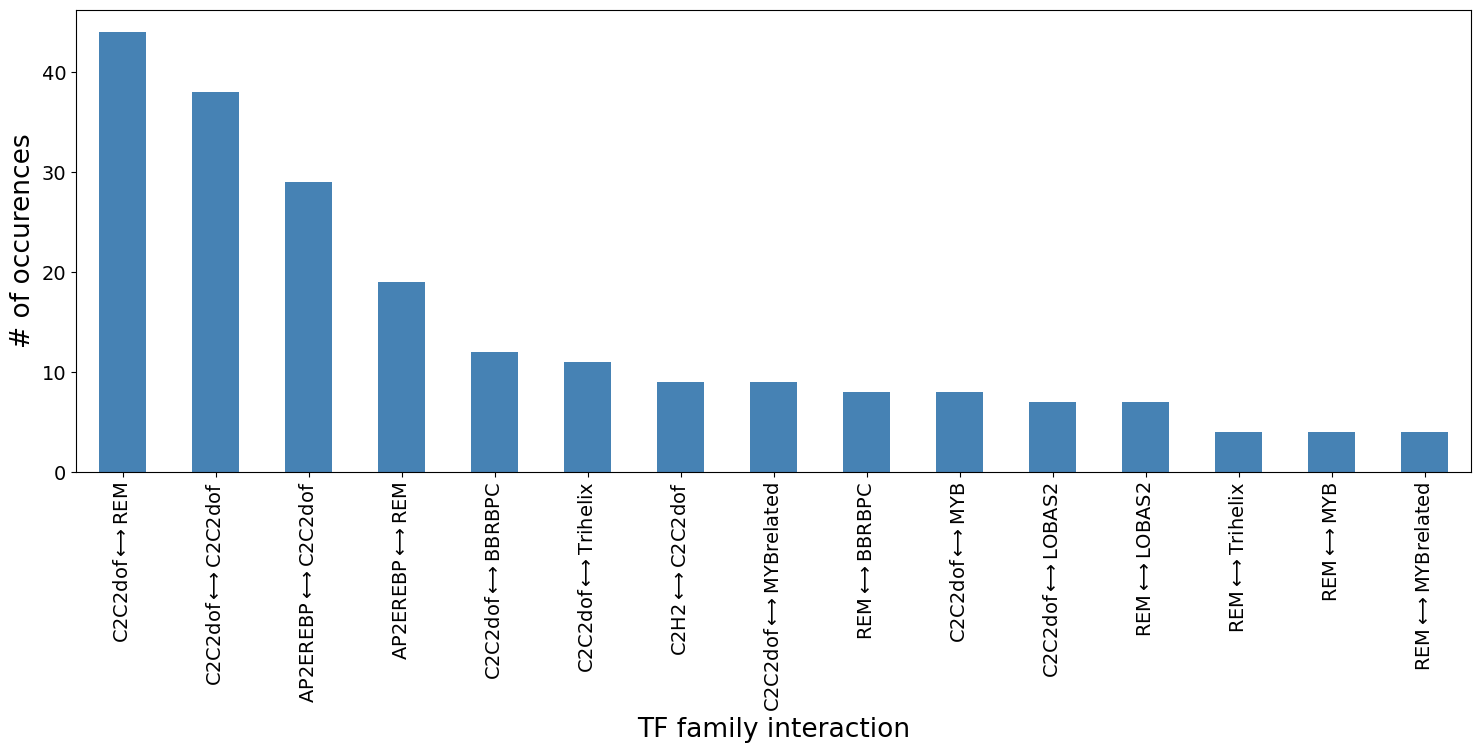

In [25]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

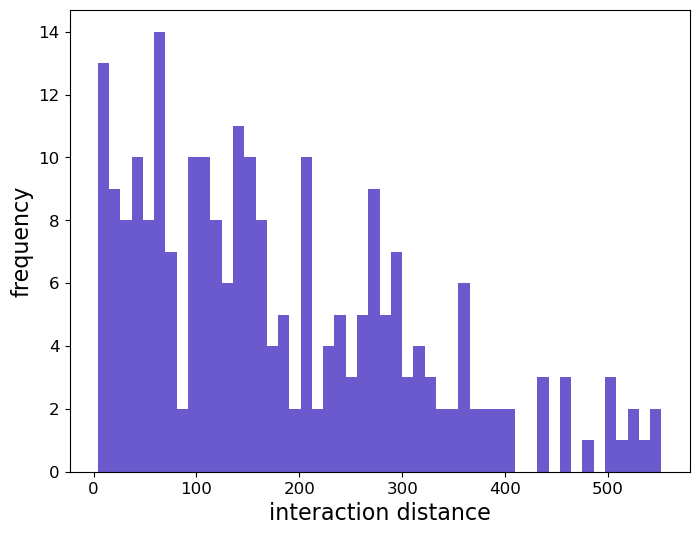

In [26]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [27]:
df['mean_distance'].mean(), df['mean_distance'].median()

(181.5899581589958, 152.0)

### Most frequent interactions and their respective interaction distances

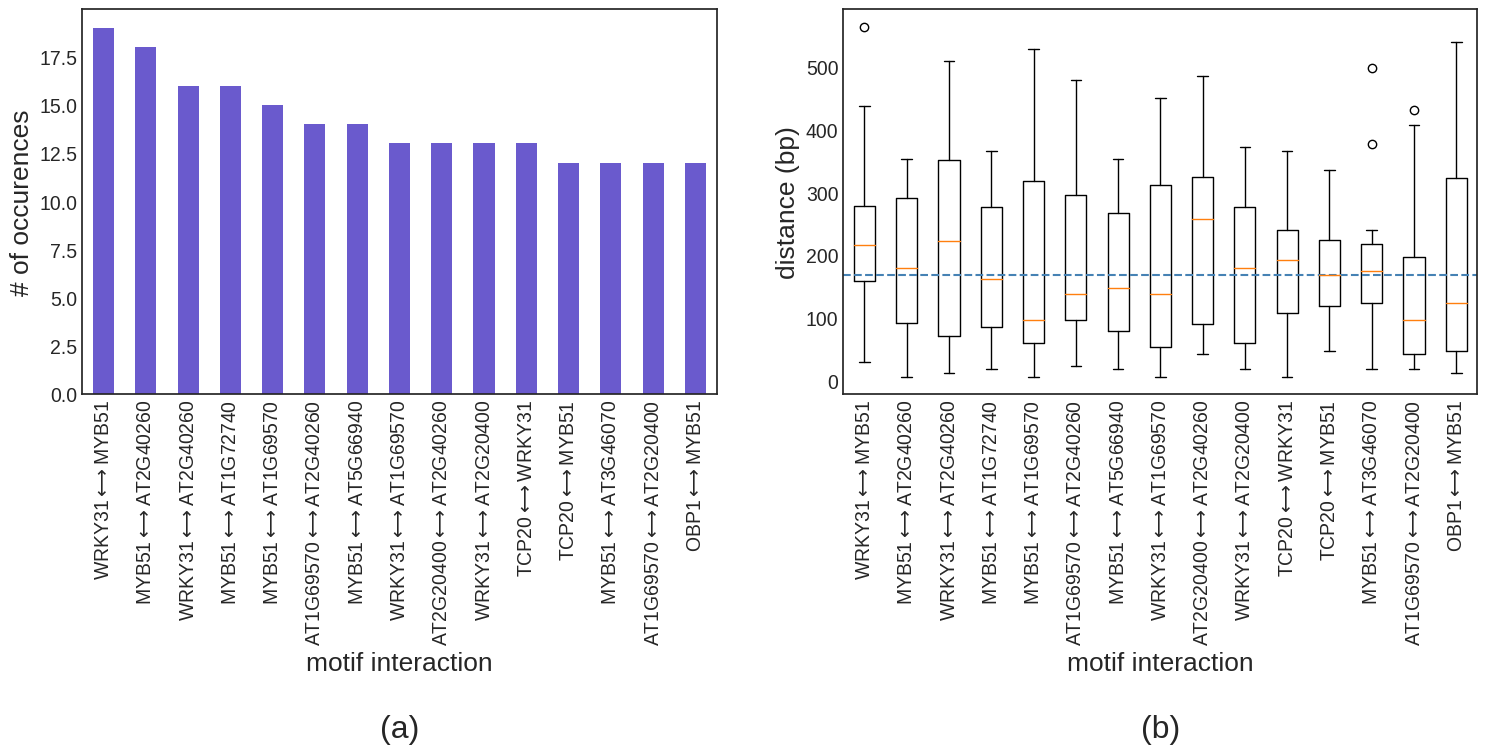

In [27]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_median_dist=True, dist_color='slateblue', cap_pos=[0.5, -0.89], store_pdf_path=f'{output}/arabidopsis_main_distance_boxplot.pdf')

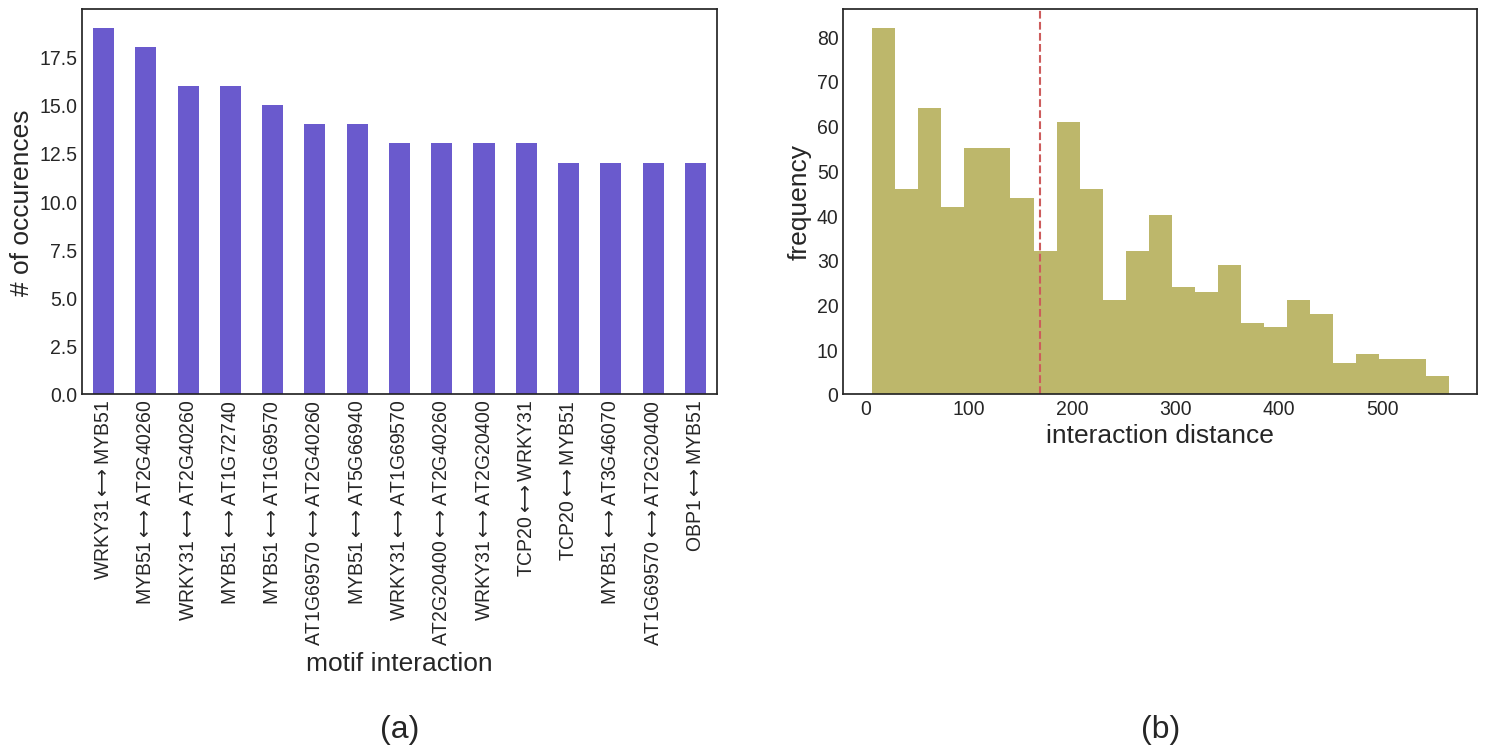

In [28]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_median_dist=True, dist_colors=['slateblue', 'darkkhaki'], cap_pos=[0.5, -0.89], store_pdf_path=f'{output}/arabidopsis_main_distance_histogram.pdf')